# BISHAL GOSWAMI

## DATA SCIENCE INTERN @LetsGrowMore

## LGMVIP TASK 1

##  Prediction using Decision tree algorithm

### Dataset : https://bit.ly/3kXTdox

### INTERMEDIATE LEVEL TASK





In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn import metrics
import seaborn as sns

### READING AND UNDERSTANDING THE DATA

In [20]:
df=pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [21]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
df.shape

(150, 6)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Creating Features Matrix

In [24]:
#let's create feature matrix
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x = df.loc[:, features].values




In [25]:
y=df.Species

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0)

In [27]:
classf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [28]:
classf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [29]:
classf.predict(x_test[0:1])

array(['Iris-virginica'], dtype=object)

In [31]:
Score = classf.score(x_test, y_test)
print(Score)


0.8947368421052632


In [32]:
print(metrics.classification_report(y_test,classf.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



### DATA VISUALISATION

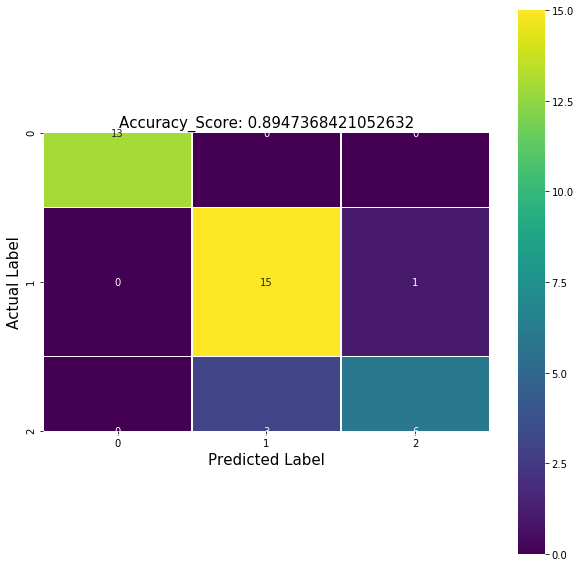

In [53]:
#let's create confusion matrix

confm = metrics.confusion_matrix(y_test, classf.predict(x_test))
## Visualise through heatmap

plt.figure(figsize=(10,10))
sns.heatmap(confm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'viridis');
plt.ylabel('Actual Label', fontsize = 15);
plt.xlabel('Predicted Label', fontsize = 15);
plt.title('Accuracy_Score: {}'.format(Score), size = 15);
plt.tick_params(labelsize= 10)

In [54]:
#Let's check list of values to try for max_depth:
Range_max_depth = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:

Accuracy = []

for depth in Range_max_depth:
    
    classf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    classf.fit(x_train, y_train)

    Score = classf.score(x_test, y_test)
    Accuracy.append(Score)

## Plotting accuracy score depth wise

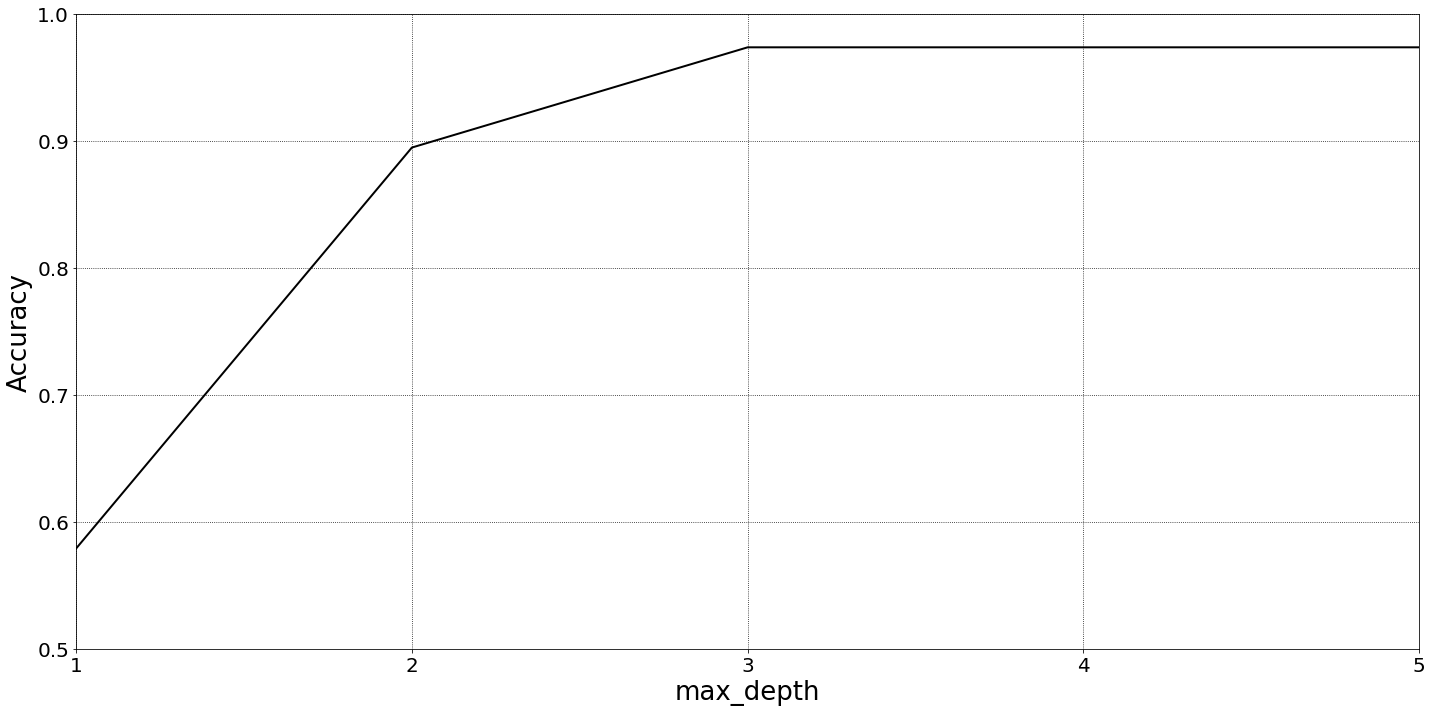

In [57]:
#let's plot accuracy score depth wise
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10));

ax.plot(Range_max_depth,
        Accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')


ax.tick_params(labelsize = 20)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 26)
ax.set_ylabel('Accuracy', fontsize = 26)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

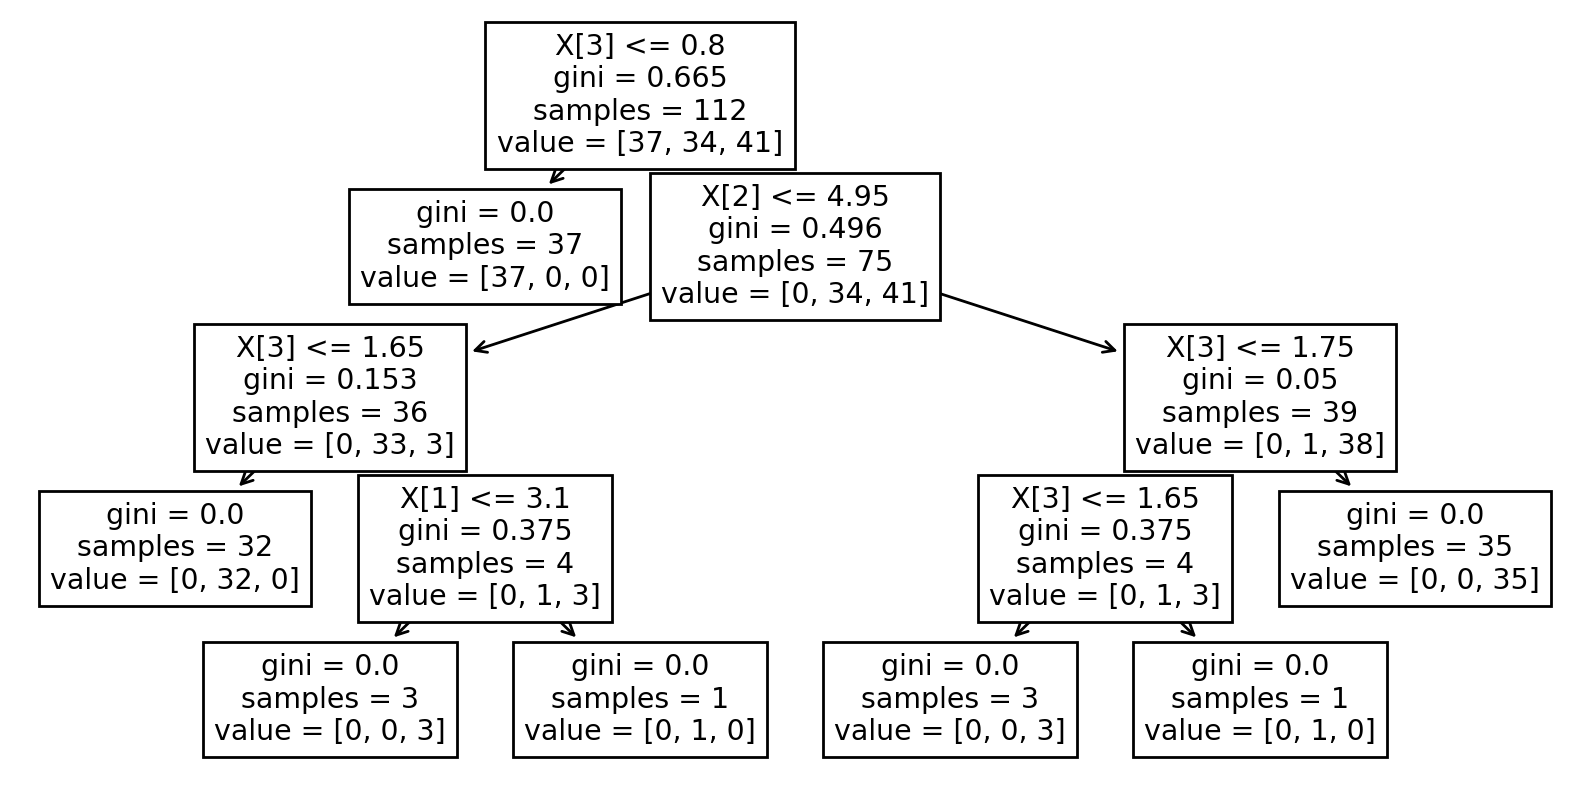

In [58]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5), dpi = 200)

tree.plot_tree(classf);


### Putting the feature names and class names into variables

In [59]:
# Let's put the feature names and class names into variables
feature_name = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_name = ['setosa', 'versicolor', 'virginica']



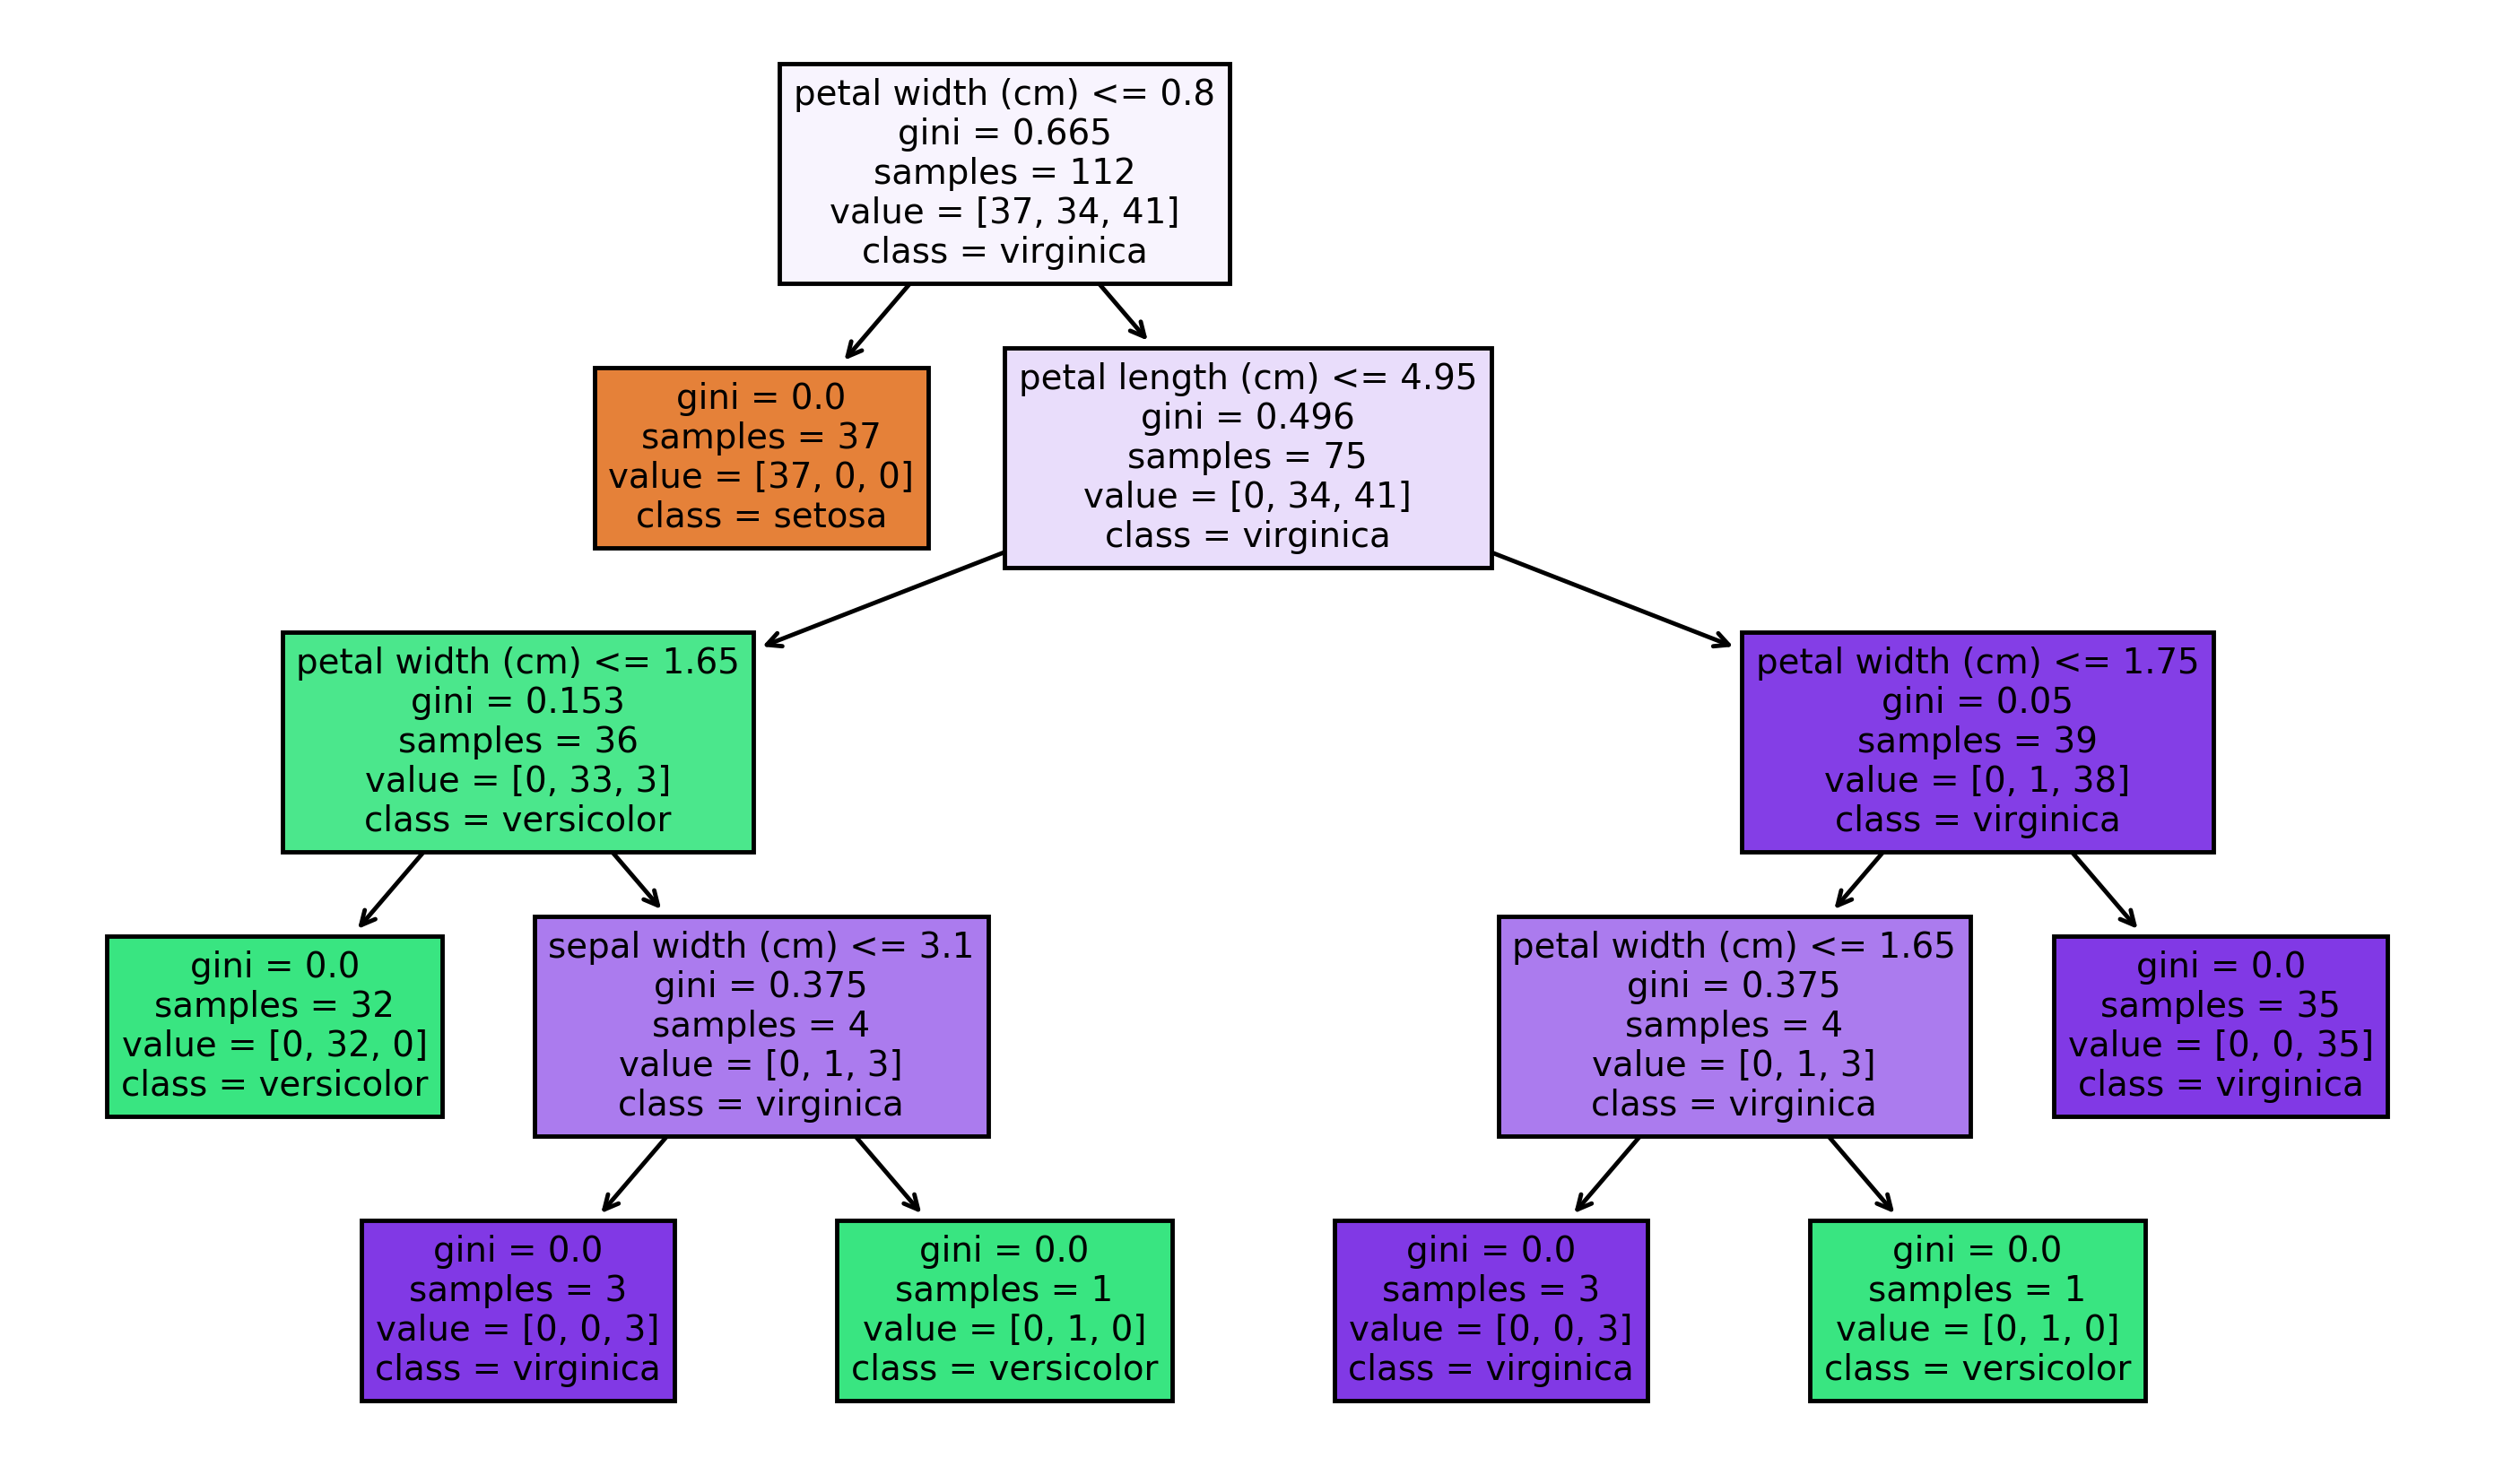

In [61]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6), dpi = 350)

tree.plot_tree(classf,
               feature_names = feature_name, 
               class_names=class_name,
               filled = True);
#fig.savefig('images/plottreefncn.png')

### CONCLUSION:

#### We can conclude that after importing and fitting our dataset in our model, the accuracy  we got is approx  89.47%.

##### We can clearly  see the  model performance by confusion matrix and classification report.

##### By ploting accuracy score depth wise graph, optimal depth for model we got  is 3.

# THANK YOU.